## ロジスティック回帰

- ロジスティック回帰はデータを線形に分類できる手法
- データが 線形分離可能 な場合に有効
- 線形分離可能 とは、ふたつの点の集合が二次元平面上にあるとき、それらの集合を一本の直線で分離できることをいう


```
X_train, X_test, y_train, y_test = tran_test_split(X, y)   # 1. 分割
lr = LogisticRegression(...)  # 2. 初期化
lr.fit(X_train, y_train)  # 3. 学習
lr.score(X_test, y_test)  # 4. スコア測定
```

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


def plot_regions(clf, X, y):
    """ モデルが学習した領域をプロット """
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.3),
                           np.arange(x2_min, x2_max, 0.3))

    Z = clf.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=ListedColormap(('red', 'blue')))

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.scatter(x=X[y == 0, 0], y=X[y == 0, 1], alpha=0.8, c='red')
    plt.scatter(x=X[y == 1, 0], y=X[y == 1, 1], alpha=0.8, c='blue')

In [5]:
import pandas as pd
df = pd.read_csv('./dataset/jh_heights_weight.csv')

X = df[["Height", "Weight"]].values
y = df["y"].values

In [9]:
#　ライブラリのインポート
from sklearn.linear_model import LogisticRegression

In [10]:
# ロジスティック回帰モデルのインスタンス生成
lr = LogisticRegression(C=1000, random_state=0)

In [12]:
# モデルの学習
lr.fit(X, y)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [14]:
# 新しいデータに対して、予測
lr.predict([
    (170, 50),
    (175, 60),
    (165, 70),
])

array([1, 1, 0])

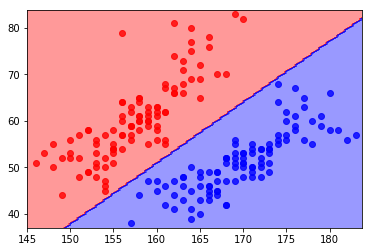

In [15]:
plot_regions(lr, X, y);

## ワインの分類をやってみよう

- オープンデータ（http://archive.ics.uci.edu/ml/datasets/Wine+Quality）
- 11種類の変数と、ワインの評価が入っている
- ロジスティック回帰分析をやって見る

### 赤ワインの分類

#### データの前処理

- 7以上に高評価フラグを立てる
- 列qualityを書き換える

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv('./dataset/winequality-red.csv')

In [36]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [37]:
for index, row in df.iterrows():
    if row.quality >= 7:
        df.iloc[int(index), -1] = 1
    else:
        df.iloc[int(index), -1] = 0

In [39]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


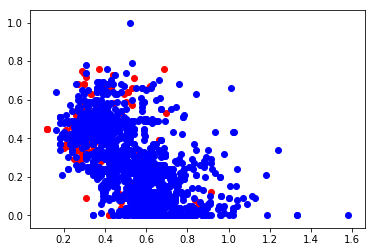

In [53]:
# グラフにプロットする

# 好評価ワインのデータのみ取得
df1 = df[df['quality'] == 1]
#低評価ワインのデータのみ取得
df0 = df[df['quality'] == 0]

plt.scatter(df1['volatile acidity'], df1['citric acid'], color='red')
plt.scatter(df0['volatile acidity'], df0['citric acid'], color='blue');

#11次元をプロットするのは不可能　→　人間の目で判断できない

#### ロジスティック回帰分析を行う

In [61]:
# ラベルを分ける
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [57]:
# データをトレーニング用、評価用に分割

from sklearn.model_selection import train_test_split
(X_train, X_test,
y_train, y_test) = train_test_split(
    X,  y, test_size=0.3, random_state=0,
)

In [58]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000)

In [59]:
lr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
lr.score(X_test, y_test)

0.88749999999999996

### 白ワインの分類

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
df = pd.read_csv('./dataset/winequality-white.csv')

In [71]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [72]:
for index, row in df.iterrows():
    if row.quality >= 7:
        df.iloc[int(index), -1] = 1
    else:
        df.iloc[int(index), -1] = 0

In [73]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,0
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,0


In [74]:
# ラベルを分ける
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [75]:
# データをトレーニング用、評価用に分割

from sklearn.model_selection import train_test_split
(X_train, X_test,
y_train, y_test) = train_test_split(
    X,  y, test_size=0.3, random_state=0,
)

In [76]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000)

In [77]:
lr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
lr.score(X_test, y_test)

0.79591836734693877

## ロジスティック回帰の弱点を知る

In [89]:
import pandas as pd
df = pd.read_csv('./dataset/limit_lr.csv')

In [90]:
df.head(3)

,x1,x2,y
0,4.461253,3.329877,0
1,3.184815,1.770784,0
2,2.501561,4.932898,0


In [91]:
X = df.iloc[:, 0:2].values
y = df.iloc[:, 2].values

In [92]:
from sklearn.model_selection import train_test_split
(X_train, X_test,
 y_train, y_test) = train_test_split(
    X, y, test_size=0.3, random_state=0,
)

In [93]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000)

In [94]:
lr.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
lr.score(X_test, y_test)

0.58333333333333337

### なぜ思わしくない結果が出たのか？

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt

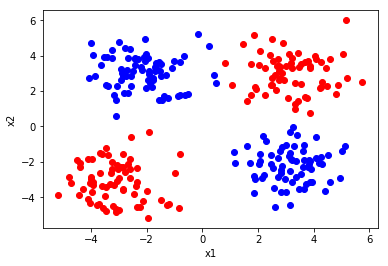

In [97]:
X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]

plt.scatter(X_train_0[:, 0], X_train_0[:, 1], color='red')
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], color='blue')
plt.xlabel('x1')
plt.ylabel('x2');

In [98]:
def judge(x1, x2):
    if (x1 > 0) ^ (x2 > 0):
        return 1
    else:
        return 0

In [99]:
answers = []
for row in X_test:
    answers.append(judge(row[0], row[1]))

In [100]:
(answers == y_test).sum() / len(y_test)

1.0

- XOR（排他的論理和）分布をしていた
    - x1かx2の片方がプラスのときに1を、両方がプラスかマイナスのときに0となる
- XORは線形に分離できない　→ 線形非分離なデータ
- 線形に分離するロジスティック回帰ではうまく分類できない

## データに特徴を加えて、線形分離可能にする

In [101]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('./dataset/limit_lr.csv')

In [102]:
df.head(5)

,x1,x2,y
0,4.461253,3.329877,0
1,3.184815,1.770784,0
2,2.501561,4.932898,0
3,3.816428,3.708999,0
4,4.224052,5.007898,0


In [103]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

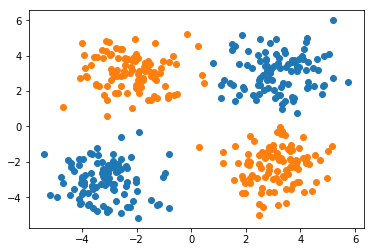

In [104]:
a = X[y == 0]
b = X[y == 1]

plt.scatter(a[:, 0], a[:, 1])
plt.scatter(b[:, 0], b[:, 1]);

In [105]:
import numpy as np
new_column = X[:, 0] * X[:, 1]
extended_X = np.hstack([X, new_column[:, np.newaxis]])
extended_X.shape

(400, 3)

In [106]:
extended_X[:2]

array([[  4.461253  ,   3.329877  ,  14.85542376],
       [  3.184815  ,   1.770784  ,   5.63961944]])

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
(X_train, X_test,
 y_train, y_test) = train_test_split(
    extended_X, y, test_size=0.3, random_state=0
)

In [109]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100)

In [110]:
lr.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
lr.score(X_test, y_test)

1.0